In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [11]:
# sel_20_acc = pd.read_csv('./3class_accuracies.csv').set_index('model_class')
# voc = False
sel_20_acc = pd.read_csv('./VOC_accuracies.csv').set_index('model_class')
voc = True

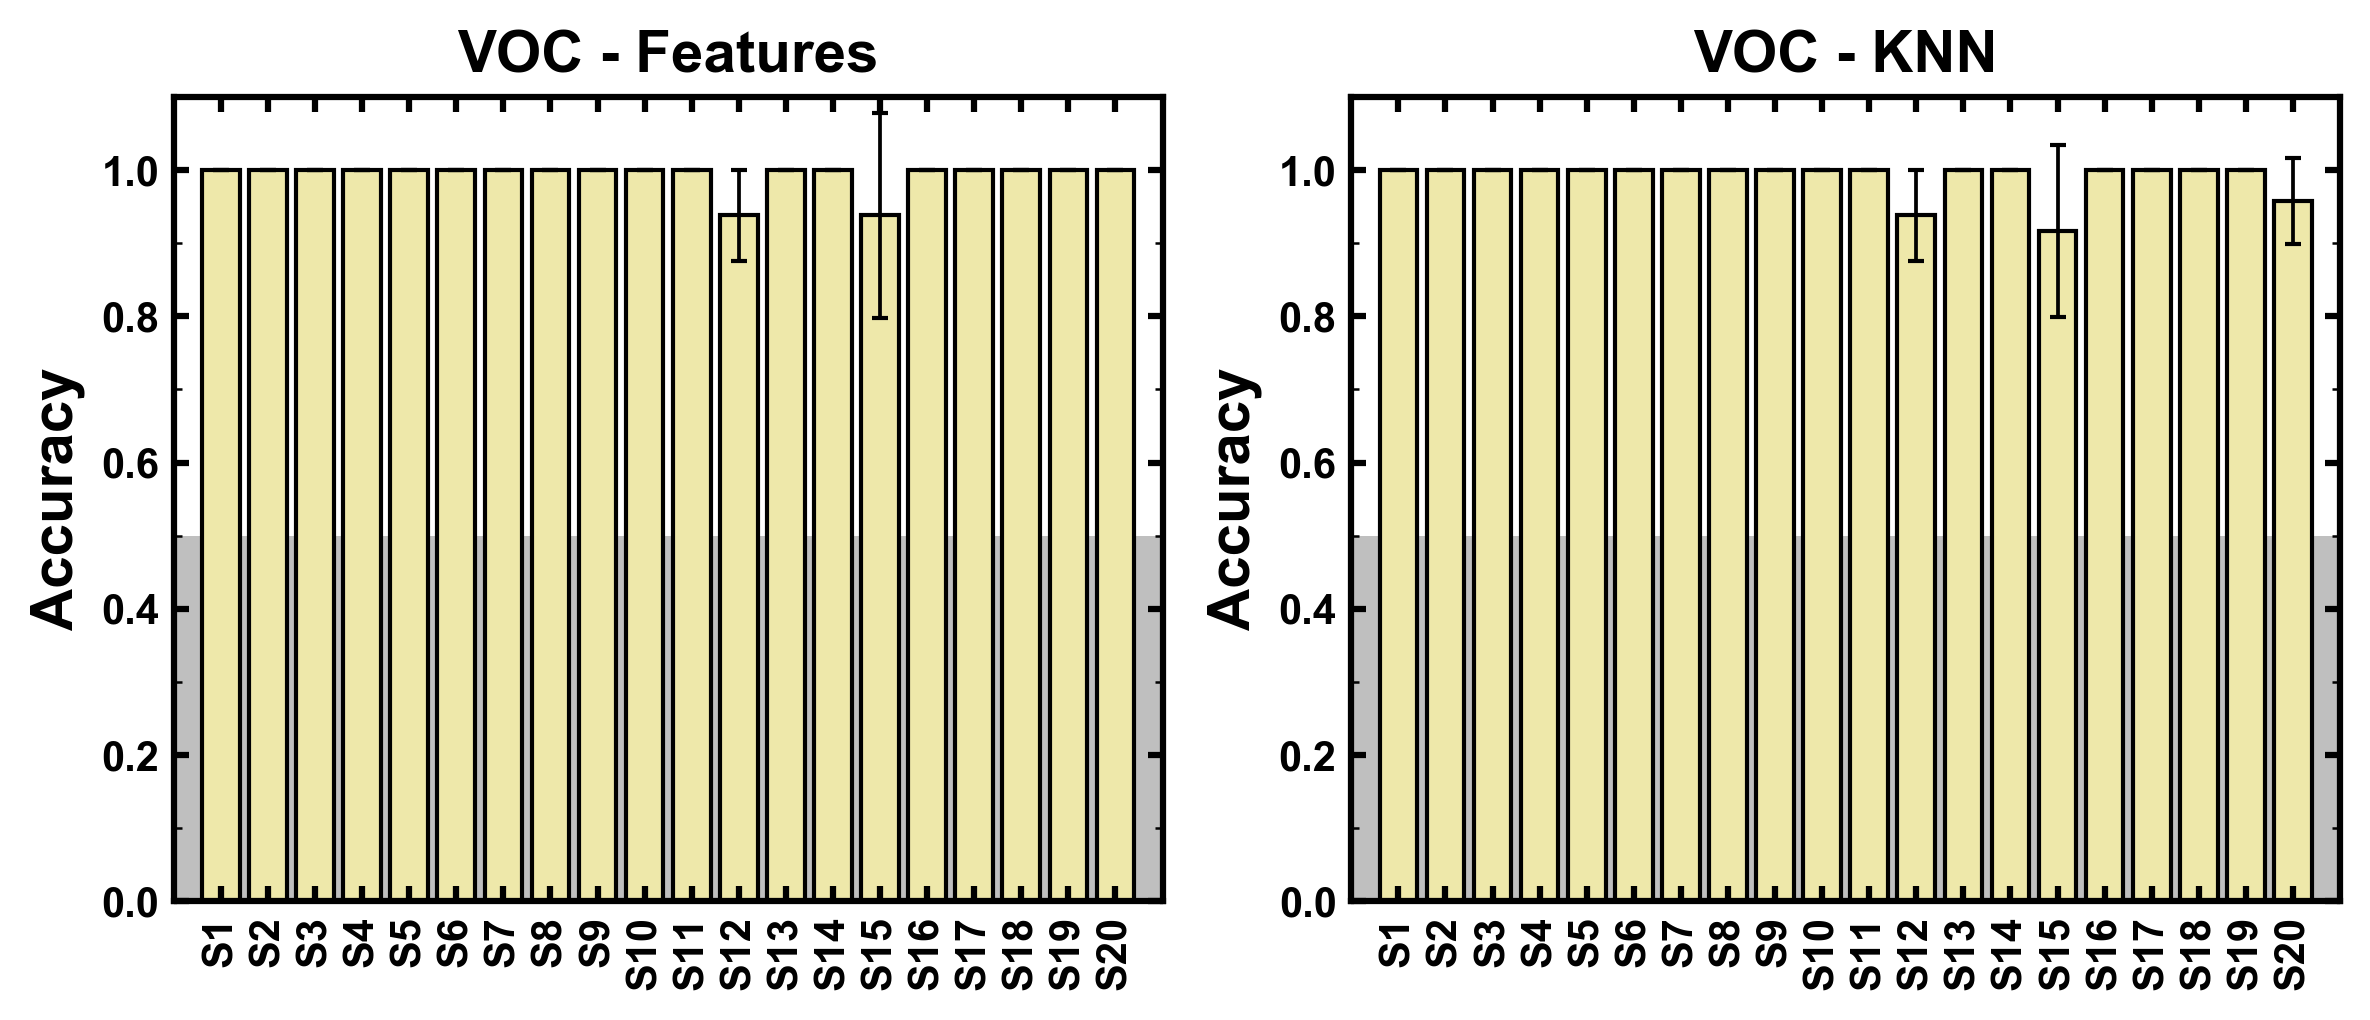

In [12]:
# plot will be a 3x2 with each row being a sample type
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator
just_cheese = True

def make_header(label):
    label = label.split('_')
    label[1] = label[1][0].upper()+ label[1][1:]
    return label[1] + ' - ' + label[0]

if just_cheese:
    fig = plt.figure(figsize=(8,3.5),dpi=300)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    axis = [ax1, ax2]
    all_names = list(sel_20_acc)
    accuracy_names = [ele for ele in all_names if 'std' not in ele]
    std_names = [ele for ele in all_names if 'std' in ele]
    if voc:
        colors = ['palegoldenrod','palegoldenrod']
    else:
        colors = ['cornflowerblue','cornflowerblue']
    indicies = list(sel_20_acc.index)
else:
    fig = plt.figure(figsize=(8,10),dpi=300)
    ax1 = fig.add_subplot(3,2,1)
    ax2 = fig.add_subplot(3,2,2)
    ax3 = fig.add_subplot(3,2,3)
    ax4 = fig.add_subplot(3,2,4)
    ax5 = fig.add_subplot(3,2,5)
    ax6 = fig.add_subplot(3,2,6)
    axis = [ax1, ax2, ax3, ax4, ax5, ax6]
    all_names = list(sel_20_acc)
    accuracy_names = [ele for ele in all_names if 'std' not in ele]
    std_names = [ele for ele in all_names if 'std' in ele]
    colors = ['cornflowerblue','cornflowerblue','mediumseagreen','mediumseagreen','lightcoral','lightcoral']
    indicies = list(sel_20_acc.index)
if voc:
    random_guess = 0.5
else:
    random_guess = 0.3333
    
    
for ind, ax,c in zip(indicies, axis, colors):
    title = make_header(ind)
    stds = sel_20_acc.loc[ind, std_names]
    accs = sel_20_acc.loc[ind, accuracy_names]
    ax.set_xticks([i for i in range(accs.shape[0])])
    ax.set_xticklabels(accuracy_names, rotation=90)
    ax.bar([i for i in range(accs.shape[0])], accs, edgecolor='k', color=c)
    ax.errorbar([i for i in range(accs.shape[0])], accs,stds, fmt='none', ecolor='k', elinewidth=0.9, capsize=2)
    titlefont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
    ax.set_title(title, **titlefont)
    ax.set_ylim([0,1.1])
    ax.set_xlim([-1,20])
    ax.fill_between([-1,20], 0, random_guess, facecolor='gray', alpha=0.5)
    
#     ax.minorticks_on()
    # setting line width for all borders
    line_width = 1.5
    [i.set_linewidth(line_width) for i in ax.spines.values()]
    # all the tick voodoo - location andsize
    ax.tick_params(top=True, right=True)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
#     ax.tick_params(which='both', axis="y",direction="in")
#     ax.tick_params(which='both', axis="x",direction="in")
    ax.xaxis.set_tick_params(width=line_width)
    ax.yaxis.set_tick_params(width=line_width)
    # setting tick label size / style
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties('Arial')
        label.set_fontsize(10) 
        label.set_fontweight('bold')
    # get the font and style of the axis labels
    lfont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
    ax.set_ylabel('Accuracy', **lfont)
    plt.tight_layout()

if just_cheese:
    plt.savefig('./20_selector_just_VOC_lightgolden.png')
else:
    plt.savefig('./20_selector_all_samples.png')

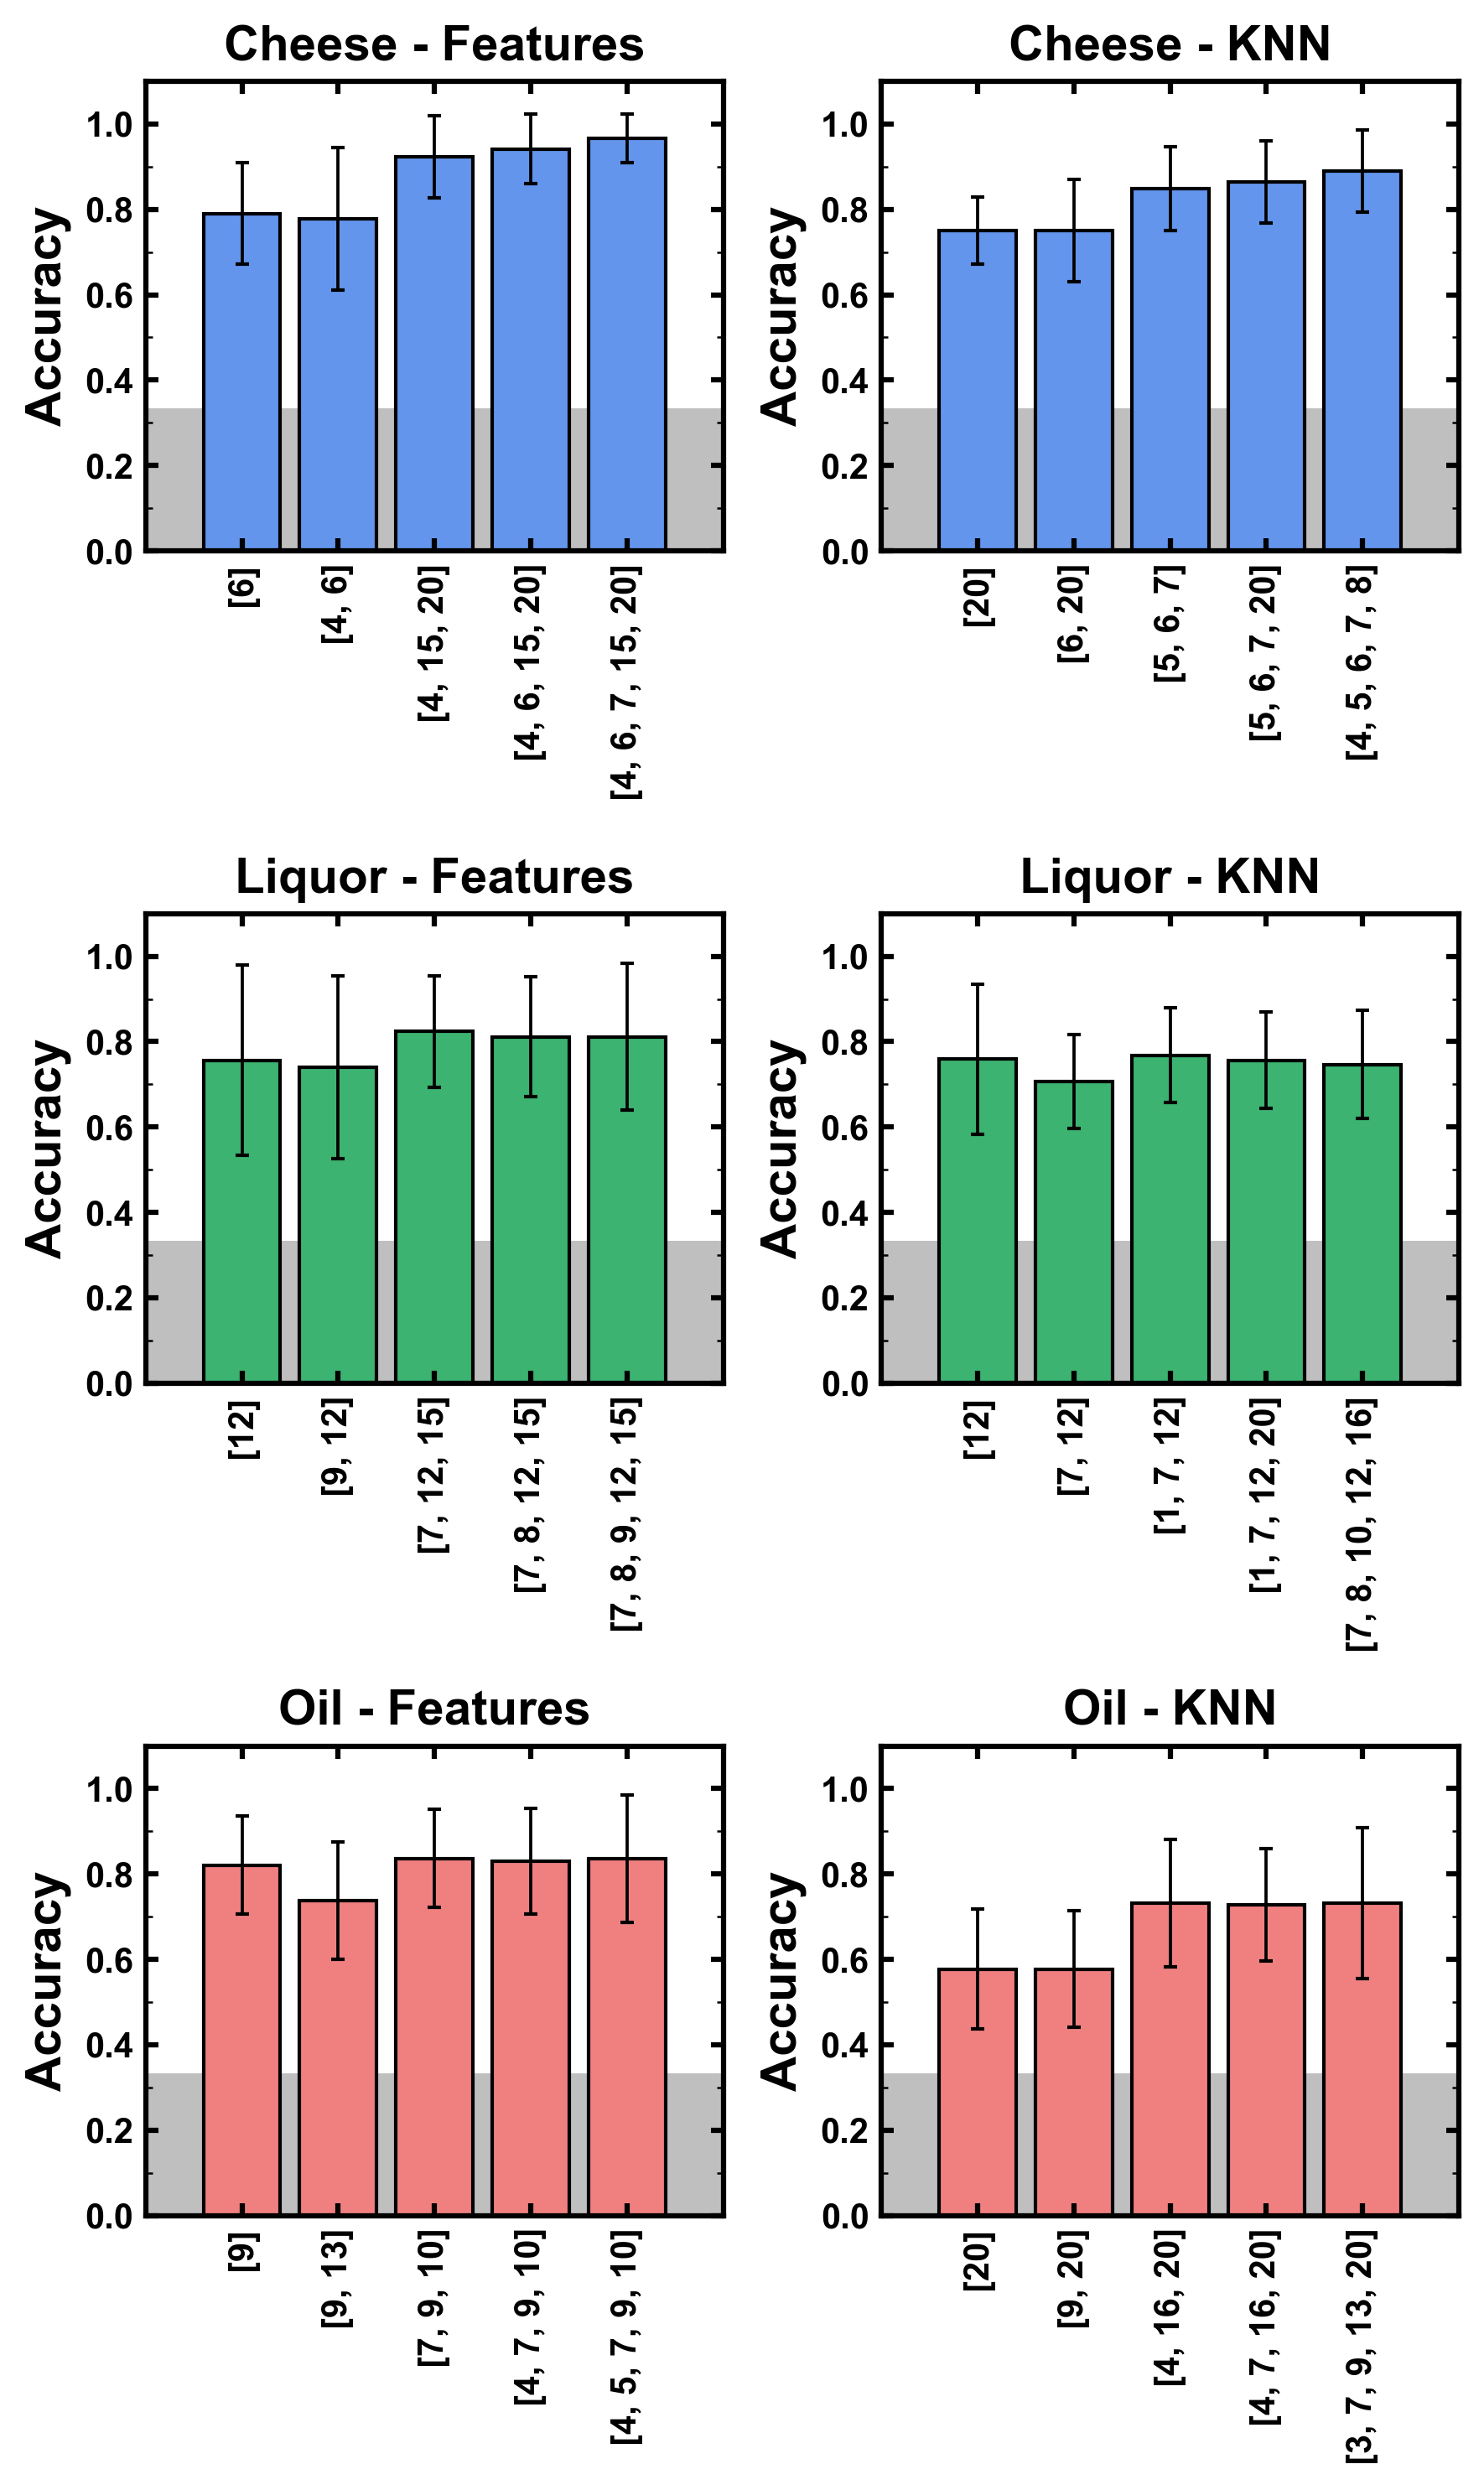

In [82]:
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator

best_sel_scan = pd.read_csv('./top_selectors_1to5.csv')
fig = plt.figure(figsize=(6,10),dpi=300)
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
axis = [ax1, ax2, ax3, ax4, ax5, ax6]
all_names = list(best_sel_scan)
accuracy_names = ['Cheese_Features', 'Cheese_KNN', 'Liquor_Features', 'Liquor_KNN', 'Oil_Features', 'Oil_KNN']
selector_names = ['Selectors_cheese_feat','Selectors_cheese_knn','Selectors_liquor_feat','Selectors_liquor_knn',
                 'Selectors_oil_feat','Selectors_oil_knn']
std_names = ['cheese_feat_std','cheese_knn_std','liquor_feat_std','liquor_knn_std', 'oil_feat_std', 'oil_knn_std']
colors = ['cornflowerblue','cornflowerblue','mediumseagreen','mediumseagreen','lightcoral','lightcoral']

for acc,ax,s_name,std,col in zip(accuracy_names, axis, selector_names, std_names, colors):
    lfont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
    nfont = {'fontname':'Arial', 'fontsize':12, 'weight':'bold'}
    title = acc.split('_')[0] + " - " + acc.split('_')[1]
    stds = np.flip(np.asarray(list(best_sel_scan[std])))
    accs = np.flip(np.asarray(list(best_sel_scan[acc])))
    names = list(best_sel_scan[s_name])[::-1]
    ax.set_xticks([i for i in range(accs.shape[0])])
    ax.set_xticklabels(names, rotation=90)
    ax.bar([i for i in range(accs.shape[0])], accs, edgecolor='k', color=col)
    ax.errorbar([i for i in range(accs.shape[0])], accs,stds, fmt='none', ecolor='k', elinewidth=0.9, capsize=2)
    titlefont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
    ax.set_title(title, **titlefont)
    ax.set_ylim([0,1.1])
    ax.set_xlim([-1,5])
    ax.fill_between([-1,5], 0, 0.33333, facecolor='gray', alpha=0.5)
#     ax.plot([0,4],[1.1,1.1], 'k')
#     ax.text(0.7,1.12, f_or_knn[0], **nfont)
#     ax.text(6.3,1.12, f_or_knn[1], **nfont)
#     ax.plot([5,9],[1.1,1.1], 'k')
    ax.minorticks_on()
#     # setting line width for all borders
    line_width = 1.5
    [i.set_linewidth(line_width) for i in ax.spines.values()]
#     # all the tick voodoo - location andsize
    ax.tick_params(top=True, right=True)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(1))
    ax.tick_params(axis='both', which='both', direction='in', top=True, bottom=True, right=True)
#     ax.tick_params(which='both', axis="y",direction="in")
# #     ax.tick_params(which='both', axis="x",direction="in")
    ax.xaxis.set_tick_params(width=line_width)
    ax.yaxis.set_tick_params(width=line_width)
#     # setting tick label size / style
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties('Arial')
        label.set_fontsize(10) 
        label.set_fontweight('bold')
    # get the font and style of the axis labels
    lfont = {'fontname':'Arial', 'fontsize':14, 'weight':'bold'}
    ax.set_ylabel('Accuracy', **lfont)
    plt.tight_layout()
plt.savefig('./1-to-5_selectors.png')


In [6]:
### ok plot the high, med and low accuracies of combos of 4 for all three
base_path = './selector_scan'
possible_dirs = os.listdir(base_path)
data = {}
for d in possible_dirs:
    if 'results' in d:
        data_type = '_'.join(d.split('_')[0:2])
        data[data_type] = {}
        results_dir = os.path.join(base_path, d)
        files = os.listdir(results_dir)
        for f in files:
            if f[-3:] == 'csv':
                name = f.split('_')[0]
                data[data_type][name] = pd.read_csv(os.path.join(results_dir,f))

In [45]:
for dt in data:
    if '3' in dt:
        continue
    obj_class = dt.split('_')[0]
    for mt in data[dt]:
        if mt not in ['KNN', 'features', 'GP']:
            continue
        # find where the middle sample samples are
        title = ''.join(dt.split('_')[0]) + ' - ' + mt[0].upper()+mt[1:] + ', Combinatorial'
        title = title[0].upper()+title[1:]
        middle = int(data[dt][mt].shape[0]/2)
        # extract the data to plot:
        beginning = data[dt][mt].loc[0:2]
        middle = data[dt][mt].loc[middle:middle+2]
        end = data[dt][mt].loc[data[dt][mt].shape[0]-3:]
        sub_data = pd.concat([beginning, middle,end])
        position = list(sub_data.index)
        position = [ele+1 for ele in position]
        pos_heights = list(sub_data['accuracy'].values + sub_data['standard_deviation'].values)
        deltas = [0.0175, 0.0175, 0.0175, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
        pos_heights = [ele1 + ele2 for ele1, ele2 in zip(pos_heights, deltas)]
        height = [list(sub_data['accuracy'].values[:3]), [-1,-1],list(sub_data['accuracy'].values[3:6]),[-1,-1],list(sub_data['accuracy'].values[6:])]
        std = [list(sub_data['standard_deviation'].values[:3]), [0,0],list(sub_data['standard_deviation'].values[3:6]),[0,0],list(sub_data['standard_deviation'].values[6:])]
        names = [list(sub_data['selectors'].values[:3]),list(sub_data['selectors'].values[3:6]),list(sub_data['selectors'].values[6:])]
        height = [ele for sub_l in height for ele in sub_l]
        std = [ele for sub_l in std for ele in sub_l]
        names = [ele for sub_l in names for ele in sub_l]
        x = [i for i in range(len(height))]
        tick_loc = [0,1,2,5,6,7,10,11,12]
        fig = plt.figure(figsize=(2.5,2.6),dpi=300)
        ax = fig.add_subplot(1,1,1)
        if obj_class == 'oil':
            c = 'lightcoral'
        if obj_class == 'liquor':
            c = 'mediumseagreen'
        if obj_class == 'cheese':
            c = 'cornflowerblue'
            
        ax.bar(x, height, edgecolor='k', color=c)
        ax.errorbar(x, height,std, fmt='none', ecolor='k', elinewidth=0.9, capsize=2)
        ax.set_xticks(tick_loc)
        titlefont = {'fontname':'Arial', 'fontsize':9, 'weight':'bold'}
        ax.set_xticklabels(names, rotation=90)
        ax.set_title(title, **titlefont)
        ax.set_ylim([0,1.1])
        ax.set_xlim([-1,14])
        ax.fill_between([-1,14], 0, 0.33333, facecolor='gray', alpha=0.5)
        titlefont = {'fontname':'Arial', 'fontsize':6, 'weight':'bold'}
        for loc, pos,h in zip(tick_loc,position, pos_heights):
            ax.text(loc-0.25,h,pos, rotation=90, **titlefont)
        ax.text(3,-0.17, '...')
        ax.text(8,-0.17, '...')
        line_width = 0.8
        [i.set_linewidth(line_width) for i in ax.spines.values()]
        # all the tick voodoo - location andsize
        ax.tick_params(top=True, right=True)
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
        ax.tick_params(axis='both', which='both', direction='in', top=False, right=True)
    #     ax.tick_params(which='both', axis="y",direction="in")
    #     ax.tick_params(which='both', axis="x",direction="in")
        ax.xaxis.set_tick_params(width=line_width)
        ax.yaxis.set_tick_params(width=line_width)
        # setting tick label size / style
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties('Arial')
            label.set_fontsize(6) 
            label.set_fontweight('bold')
        # get the font and style of the axis labels
        lfont = {'fontname':'Arial', 'fontsize':9, 'weight':'bold'}
        ax.set_ylabel('Accuracy', **lfont)
        save_name = title.split()
        save_name[2] = save_name[2][:-1]
        save_name = '_'.join(save_name)
        plt.tight_layout()
        plt.savefig('./{}.png'.format(save_name))
#         plt.show()
        plt.gcf().clear()
        

<Figure size 750x780 with 0 Axes>

<Figure size 750x780 with 0 Axes>

<Figure size 750x780 with 0 Axes>

<Figure size 750x780 with 0 Axes>

<Figure size 750x780 with 0 Axes>

<Figure size 750x780 with 0 Axes>

<Figure size 750x780 with 0 Axes>

<Figure size 750x780 with 0 Axes>

<Figure size 750x780 with 0 Axes>

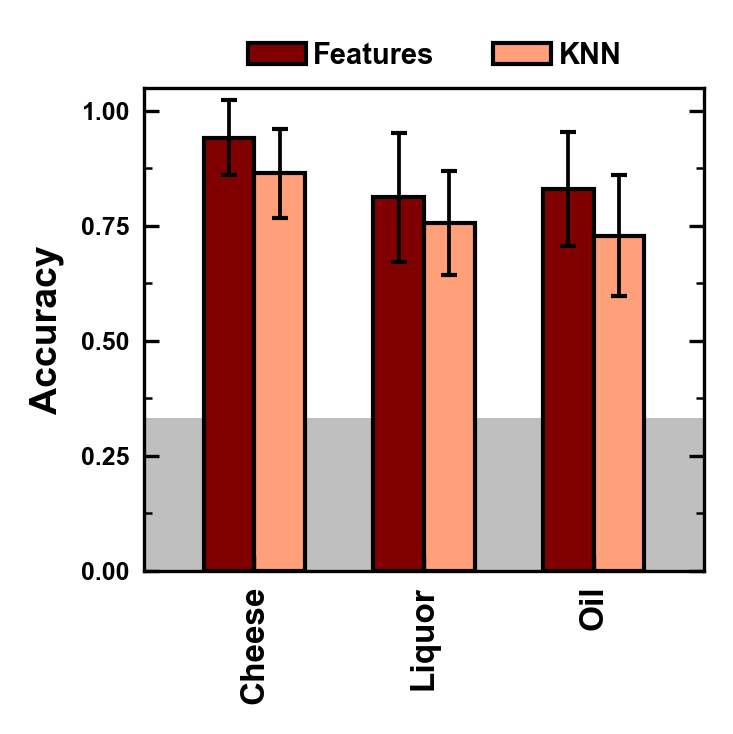

In [56]:
### plot the cheese / liquor / oil 4/3 best combos in one plot with KNN and GP (or atleast the ones used for further studies)
all_data = {'Cheese - 4': [0,0,0,0], 'Liquor - 4': [0,0,0,0], 'Oil - 4': [0,0,0,0]}
for dt in data:
    if '3' in dt: 
        continue
    for mt in data[dt]:
        if mt not in ['KNN', 'features']:
            continue
        title = ' - '.join(dt.split('_')) 
        title = title[0].upper()+title[1:]
#         print(title, mt, data[dt][mt].loc[0]['accuracy'])
        if mt == 'KNN':
            i = 0
            j = 1
        else:
            i = 2
            j = 3
#         extract the data to plot:
        all_data[title][i] = data[dt][mt].loc[0]['accuracy']
        all_data[title][j] = data[dt][mt].loc[0]['standard_deviation']
all_data = pd.DataFrame(all_data)
ind = ['KNN', 'KNN - std', 'Features', 'Features - std']
all_data['new_ind'] = ind
all_data = all_data.set_index('new_ind')
all_data = all_data.T
bh1 = list(all_data['KNN'].values)
bh2 = list(all_data['Features'].values)
be1 = list(all_data['KNN - std'].values)
be2 = list(all_data['Features - std'].values)
x = np.asarray([i for i in range(len(bh1))])
bar_width = 0.3

fig = plt.figure(figsize=(2.5,2.6),dpi=300)
ax = fig.add_subplot(1,1,1)
ax.bar(x, bh2, bar_width, edgecolor='k', color='maroon')
ax.bar(x+bar_width, bh1, bar_width, edgecolor='k', color='lightsalmon')
ax.errorbar(x, bh2,be2, fmt='none', ecolor='k', elinewidth=0.9, capsize=2)
ax.errorbar(x+bar_width, bh1,be1, fmt='none', ecolor='k', elinewidth=0.9, capsize=2)
ax.set_xticks(x+bar_width/2)
names = list(all_data.index)
ax.set_xticklabels(['Cheese','Liquor', 'Oil'], rotation=90)
ax.set_ylim([0,1.05])
ax.set_xlim([-0.5,2.8])
ax.fill_between([-1,14], 0, 0.33333, facecolor='gray', alpha=0.5)
titlefont = {'fontname':'Arial', 'fontsize':6, 'weight':'bold'}
line_width = 0.8
[i.set_linewidth(line_width) for i in ax.spines.values()]
# all the tick voodoo - location andsize
ax.tick_params(top=True, right=True)
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(axis='both', which='both', direction='in', top=False, right=True)
ax.xaxis.set_tick_params(width=line_width)
ax.yaxis.set_tick_params(width=line_width)
# setting tick label size / style
for label in ( ax.get_yticklabels()):
    label.set_fontproperties('Arial')
    label.set_fontsize(6) 
    label.set_fontweight('bold')
for label in (ax.get_xticklabels() ):
    label.set_fontproperties('Arial')
    label.set_fontsize(8) 
    label.set_fontweight('bold')
# get the font and style of the axis labels
lfont = {'fontname':'Arial', 'fontsize':9, 'weight':'bold'}
ax.set_ylabel('Accuracy', **lfont)

p2 = mpatches.Patch(edgecolor='k', facecolor='lightsalmon', label='KNN', alpha=1)
p1 = mpatches.Patch(edgecolor='k', facecolor='maroon', label='Features', alpha=1)
hands = [p1,p2]
legend_prop = {'family':'Arial', 'size':7, 'weight':'bold'}
plt.legend(handles=hands, bbox_to_anchor=(0.9, 1.15), frameon=False, prop=legend_prop, handletextpad=0.25, labelspacing=0.1, ncol=3)


save_name = 'best_accuracy_all_samples_multi_selectors'
plt.tight_layout()
plt.savefig('./{}.png'.format(save_name))
plt.show()

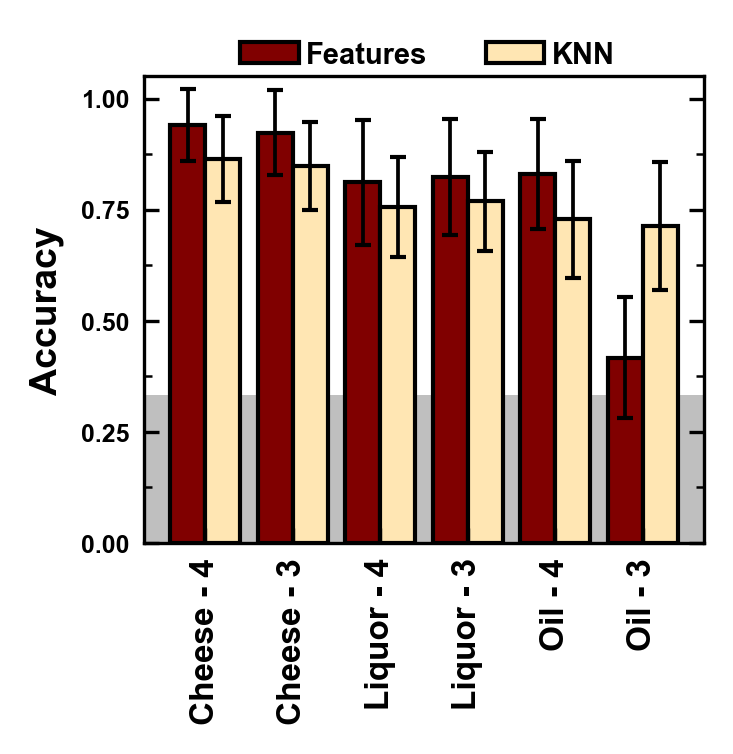

In [31]:
### plot the cheese / liquor / oil 4/3 best combos in one plot with KNN and GP (or atleast the ones used for further studies)
all_data = {'Cheese - 4': [0,0,0,0], 'Cheese - 3': [0,0,0,0], 'Liquor - 4': [0,0,0,0], 
            'Liquor - 3': [0,0,0,0], 'Oil - 4': [0,0,0,0], 'Oil - 3': [0,0,0,0]}
for dt in data:
    for mt in data[dt]:
        if mt not in ['KNN', 'features']:
            continue
        title = ' - '.join(dt.split('_')) 
        title = title[0].upper()+title[1:]
#         print(title, mt, data[dt][mt].loc[0]['accuracy'])
        if mt == 'KNN':
            i = 0
            j = 1
        else:
            i = 2
            j = 3
#         extract the data to plot:
        all_data[title][i] = data[dt][mt].loc[0]['accuracy']
        all_data[title][j] = data[dt][mt].loc[0]['standard_deviation']
all_data = pd.DataFrame(all_data)
ind = ['KNN', 'KNN - std', 'Features', 'Features - std']
all_data['new_ind'] = ind
all_data = all_data.set_index('new_ind')
all_data = all_data.T
bh1 = list(all_data['KNN'].values)
bh2 = list(all_data['Features'].values)
be1 = list(all_data['KNN - std'].values)
be2 = list(all_data['Features - std'].values)
x = np.asarray([i for i in range(len(bh1))])
bar_width = 0.4

fig = plt.figure(figsize=(2.5,2.6),dpi=300)
ax = fig.add_subplot(1,1,1)
ax.bar(x, bh2, bar_width, edgecolor='k', color=(0.5,0,0))
ax.bar(x+bar_width, bh1, bar_width, edgecolor='k', color=(1.0,0.9,0.7))
ax.errorbar(x, bh2,be2, fmt='none', ecolor='k', elinewidth=0.9, capsize=2)
ax.errorbar(x+bar_width, bh1,be1, fmt='none', ecolor='k', elinewidth=0.9, capsize=2)
ax.set_xticks(x+bar_width/2)
names = list(all_data.index)
ax.set_xticklabels(names, rotation=90)
ax.set_ylim([0,1.05])
ax.set_xlim([-0.5,5.9])
ax.fill_between([-1,14], 0, 0.33333, facecolor='gray', alpha=0.5)
titlefont = {'fontname':'Arial', 'fontsize':6, 'weight':'bold'}
line_width = 0.8
[i.set_linewidth(line_width) for i in ax.spines.values()]
# all the tick voodoo - location andsize
ax.tick_params(top=True, right=True)
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(axis='both', which='both', direction='in', top=False, right=True)
ax.xaxis.set_tick_params(width=line_width)
ax.yaxis.set_tick_params(width=line_width)
# setting tick label size / style
for label in ( ax.get_yticklabels()):
    label.set_fontproperties('Arial')
    label.set_fontsize(6) 
    label.set_fontweight('bold')
for label in (ax.get_xticklabels() ):
    label.set_fontproperties('Arial')
    label.set_fontsize(8) 
    label.set_fontweight('bold')
# get the font and style of the axis labels
lfont = {'fontname':'Arial', 'fontsize':9, 'weight':'bold'}
ax.set_ylabel('Accuracy', **lfont)

p2 = mpatches.Patch(edgecolor='k', facecolor=(1.0,0.9,0.7), label='KNN', alpha=1)
p1 = mpatches.Patch(edgecolor='k', facecolor=(0.5,0,0), label='Features', alpha=1)
hands = [p1,p2]
legend_prop = {'family':'Arial', 'size':7, 'weight':'bold'}
plt.legend(handles=hands, bbox_to_anchor=(0.125, .96), frameon=False, prop=legend_prop, handletextpad=0.25, labelspacing=0.1, ncol=3)


save_name = 'best_accuracy_all_samples_multi_selectors'
plt.tight_layout()
plt.savefig('./{}.png'.format(save_name))
plt.show()